In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/content/train.csv")

In [4]:
train.head()


,image_id,wind_speed,storm_id,relative_time,ocean
0,abs_000,43,abs,0,2
1,abs_001,44,abs,1800,2
2,abs_002,45,abs,5400,2
3,abs_003,52,abs,17999,2
4,abs_004,53,abs,19799,2


In [5]:
train.shape

(70257, 5)

In [8]:
train.groupby("storm_id").image_id.count()

storm_id
abs     57
acd    123
aek     32
afs    221
agl    129
      ... 
zvx    102
zwh     78
zyp    127
zza     61
zzp    226
Name: image_id, Length: 494, dtype: int64

Text(0, 0.5, 'Number of Storms')

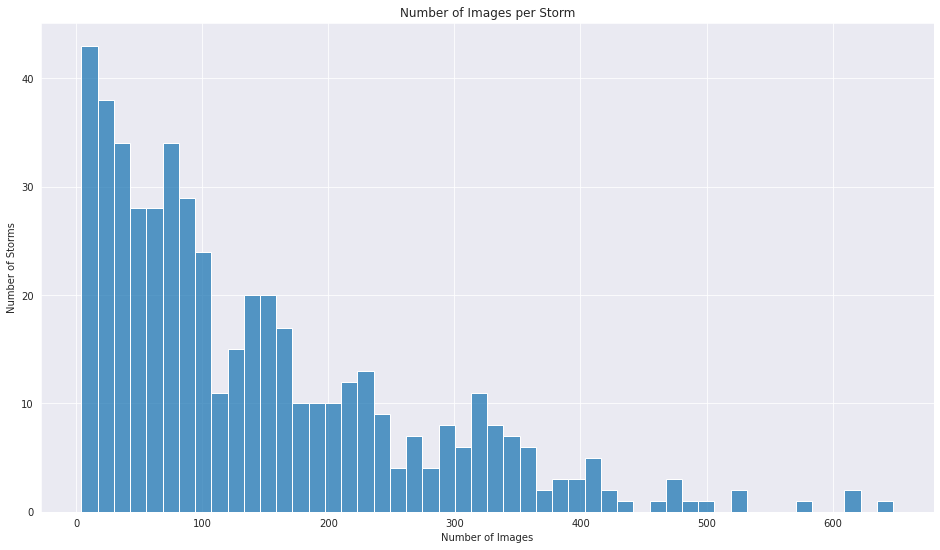

In [17]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 9))
sns.histplot(train.groupby("storm_id").image_id.count(), bins=50)
plt.title("Number of Images per Storm")
plt.xlabel("Number of Images")
plt.ylabel("Number of Storms")

In [7]:
pd.DataFrame(train["wind_speed"].describe())

,wind_speed
count,70257.000000
mean,50.344008
std,26.795277
min,15.000000
25%,30.000000
50%,43.000000
75%,62.000000
max,185.000000


In [24]:
train.groupby("ocean").image_id.count()

ocean
1    47350
2    22907
Name: image_id, dtype: int64

Text(0.5, 1.0, 'Percentage of Images per Ocean')

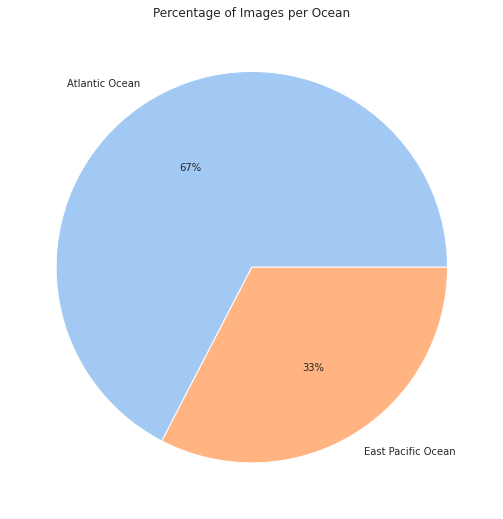

In [35]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 9))
labels = ["Atlantic Ocean", "East Pacific Ocean"]
colors = sns.color_palette('pastel')[0:2]
plt.pie(train.groupby("ocean").image_id.count(), labels=labels, autopct='%.0f%%', colors=colors)
plt.title("Percentage of Images per Ocean")

Text(0.5, 1.0, 'Number of Storms per Ocean')

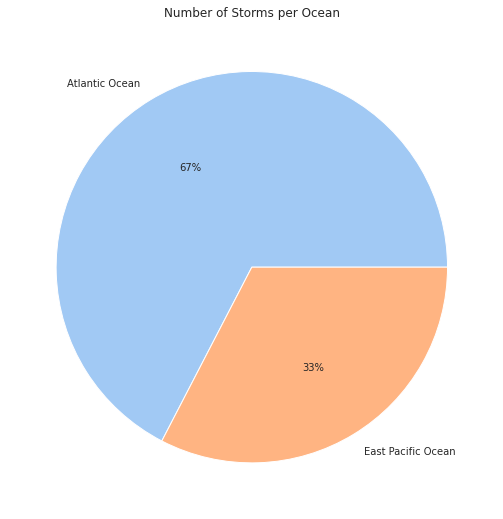

In [34]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 9))
labels = ["Atlantic Ocean", "East Pacific Ocean"]
colors = sns.color_palette('pastel')[0:2]
plt.pie(train.groupby("ocean").storm_id.count(), labels=labels, autopct='%.0f%%', colors=colors)
plt.title("Percentage of Storms per Ocean")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Wind Speed')

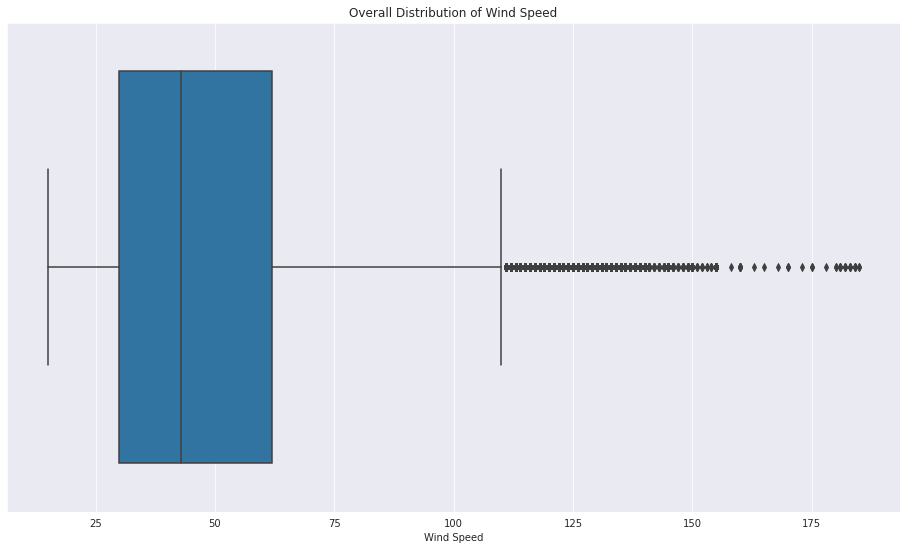

In [37]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 9))
sns.boxplot(train["wind_speed"])
plt.title("Overall Distribution of Wind Speed")
plt.xlabel("Wind Speed")

In [55]:
def plot_wind_speeds(storm_id):
    storm = train[train.storm_id == storm_id]
    plt.figure(figsize=(16, 9))
    sns.lineplot("relative_time", "wind_speed", data=storm, color="blue", markers=True)
    plt.ticklabel_format(useOffset=False)
    plt.ylabel("Wind Speeds")
    plt.xlabel("Relative Time")
    plt.title(f"Wind Speed v/s Relative Time: Storm {storm_id}")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


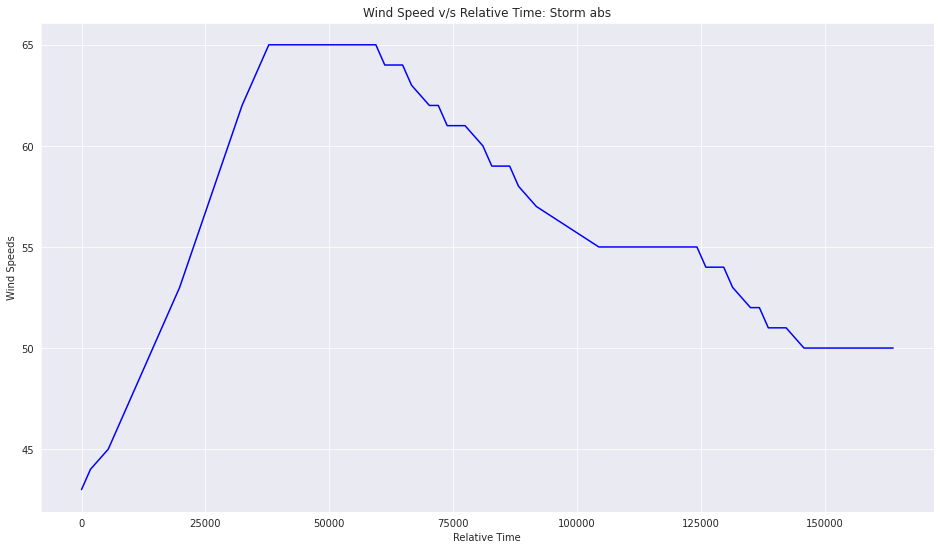

In [56]:
plot_wind_speeds("abs")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


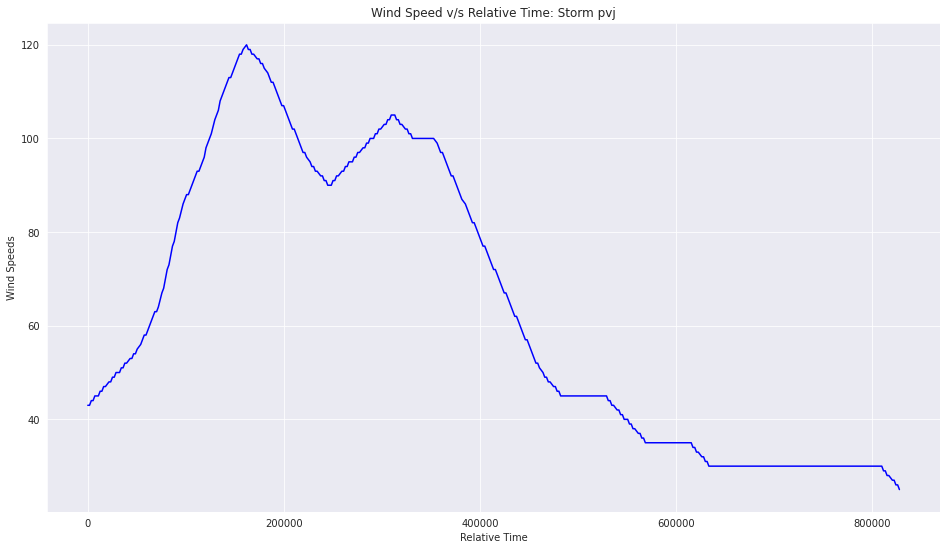

In [58]:
plot_wind_speeds("pvj")